<a href="https://colab.research.google.com/github/datle2403/datle2403/blob/main/Copy_of_webscrapping_finallll.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import dateutil.parser as dparser
from datetime import date 
import matplotlib.pyplot as plt

In [ ]:
doc="""An Giang
Vũng Tàu
Phan Rang
Quy Nhơn
Bạc Liêu
Biên Hòa
Bình Phước
Bắc Kạn
Bắc Giang
Bắc Ninh
Bến Tre
Bình Dương
Bình Định
Bình Phước
Bình Thuận
Cà Mau
Cao Bằng
Cần Thơ
Đà Nẵng
Đà  Nẵng
Đắk Lắk
Đắk Nông
Điện Biên
Đồng Nai
Đồng Tháp
Gia Lai
Hà Giang
Hà Nam
Hà Nội
Hà Tây
Hà Tĩnh
Hạ Long
Hải Dương
Hải Phòng
Hòa Bình
Hồ Chí Minh
Huế
Hậu Giang
Hưng Yên
Khánh Hòa
Kiên Giang
Kon Tum
Lai Châu
Lào Cai
Lạng Sơn
Lâm Đồng
Long An
Long Xuyên
Phú Qúy
Nam Định
Nha Trang
Nghệ An
Ninh Bình
Ninh Thuận
Nha Trang
Miền Tây
Phú Thọ
Phú Yên
Quảng Bình
Quảng Nam
Quảng Ngãi
Quãng Ngãi
Quảng Ninh
Quảng Trị
Sóc Trăng
Sơn La
Tây Ninh
Thái Bình
Thái Nguyên
Thanh Hóa
Huế
Tiền Giang
Trà Vinh
Tuyên Quang
Vĩnh Long
HCM
Vĩnh Phúc
Yên Bái"""
lst=doc.split('\n')
for x in range(0,len(lst)):
    lst[x]=lst[x].lower()

In [ ]:
def location(text):
  text=text.lower()
  for x in lst:
    if str(x) in str(text):
      remain=text.replace(x,'')
      return str(x)
  return False


In [34]:
  from datetime import date 
  today = date.today()
  l=list(str(today).split('-'))
  m=int(l[2])-1
  l[2]=str(m)
  dat=l[2]+'-'+l[1]+'-'+l[0]
  d=l[0]+l[1]+l[2]
  d

'20221026'

In [35]:
def xu_ly(ngay):
  
  from datetime import date 
  today = date.today()
  n=list(str(today).split('-'))
  m=int(n[2])-1-ngay
  n[2]=str(m)
  dat=n[2]+'-'+n[1]+'-'+n[0]
  d=n[2]+n[1]+n[0]
    
  html=f'https://tygiadola.net/LichSuGiaVang?date={dat}'
  print(html)
  page= requests.get(html).text # this is html text
  soup=BeautifulSoup(page,'lxml')
  data=soup.find('table',class_='table table-condensed table-hover table-bordered')
  data=data.find_all('tr',class_='')
  dct={}
  loc=[]
  p_in=[]
  p_out=[]
  dae=[]
  for x in data:
    y=x.find_all('td')
    if len(y)==1:
      continue
    loca=str(y[0].text).strip().replace('\r\n','')
    l=['DOJI HCM','DOJI HN','PNJ HCM','PNJ Hà Nội','Phú Qúy SJC']
    if loca in l:
      continue
    loca=location(loca)
    if loca ==False:
      continue
    g=y[1].find('span')
    g.replaceWith('')
    h=y[2].find('span')
    h.replaceWith('')
    price_in=float(str(y[1].text).strip().replace(',','').replace('\r\n',''))
    price_out=float(str(y[2].text).strip().replace(',','').replace('\r\n',''))
    loc.append(loca)
    p_in.append(price_in)
    p_out.append(price_out)
    dae.append(d)
  dct['location']=loc
  dct['price_in']=p_in
  dct['price_out']=p_out
  dct['date']=dae
  dataset=pd.DataFrame(dct)
  return dataset

In [36]:
def run(chon_ngay_gan_nhat):
  d=[]
  for x in reversed(range(chon_ngay_gan_nhat)):
    d.append(xu_ly(x))
  result = pd.concat(d,ignore_index=True)
  return result
  

dataset=run(10)

https://tygiadola.net/LichSuGiaVang?date=17-10-2022
https://tygiadola.net/LichSuGiaVang?date=18-10-2022
https://tygiadola.net/LichSuGiaVang?date=19-10-2022
https://tygiadola.net/LichSuGiaVang?date=20-10-2022
https://tygiadola.net/LichSuGiaVang?date=21-10-2022
https://tygiadola.net/LichSuGiaVang?date=22-10-2022
https://tygiadola.net/LichSuGiaVang?date=23-10-2022
https://tygiadola.net/LichSuGiaVang?date=24-10-2022
https://tygiadola.net/LichSuGiaVang?date=25-10-2022
https://tygiadola.net/LichSuGiaVang?date=26-10-2022


In [37]:
dataset

,location,price_in,price_out,date
0,hcm,66000.0,67000.0,17102022
1,hà nội,66000.0,67020.0,17102022
2,đà nẵng,66000.0,67020.0,17102022
3,nha trang,66000.0,67020.0,17102022
4,cà mau,66000.0,67020.0,17102022
...,...,...,...,...
105,huế,66370.0,67430.0,26102022
106,biên hòa,66400.0,67400.0,26102022
107,miền tây,66400.0,67400.0,26102022
108,quãng ngãi,66400.0,67400.0,26102022


In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   location   110 non-null    object 
 1   price_in   110 non-null    float64
 2   price_out  110 non-null    float64
 3   date       110 non-null    object 
dtypes: float64(2), object(2)
memory usage: 3.6+ KB


In [39]:
dataset['date'] = pd.to_datetime(dataset['date'], format='%d%m%Y')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   location   110 non-null    object        
 1   price_in   110 non-null    float64       
 2   price_out  110 non-null    float64       
 3   date       110 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 3.6+ KB


             location  price_in  price_out
date                                      
2022-10-17  nha trang   66000.0    67020.0
2022-10-18  nha trang   66100.0    67120.0
2022-10-19  nha trang   66000.0    67020.0
2022-10-20  nha trang   66200.0    67220.0
2022-10-21  nha trang   66300.0    67320.0
2022-10-22  nha trang   66500.0    67520.0
2022-10-23  nha trang   66500.0    67520.0
2022-10-24  nha trang   66300.0    67320.0
2022-10-25  nha trang   66200.0    67220.0
2022-10-26  nha trang   66400.0    67420.0


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


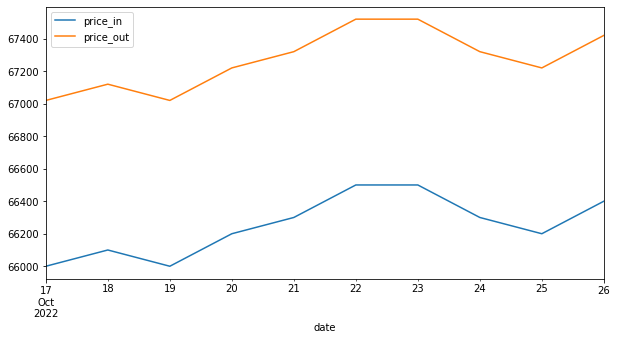

In [41]:
dataset.to_csv('dataset.csv')
df=pd.read_csv("dataset.csv", parse_dates=True, index_col = "date")
dataFrame = df[df['location'].str.contains('nha trang')]
dataFrame.drop(columns='Unnamed: 0',inplace=True)
print(dataFrame)
dataFrame.plot(figsize=(10, 5))